In [3]:
import pandas as pd
import numpy as np

In [4]:
#read the csv file from the directory
df = pd.read_csv (r"C:\Users\gabriel.souza_ifood\Desktop\Private\MBA\Master's Degree NOVA IMS\Data Mining\Lecture\Lec3\db_spcork_sample_mail.csv")

In [5]:
df.head()

,Custid,Dayswus,Age,Edu,Income,Kidhome,Teenhome,Freq,Recency,Monetary,Spcork
0,1005,1062,59,18,91852,0,1,25,26,1138,1
1,1014,619,35,18,57997,1,1,5,28,81,0
2,1015,1133,32,20,50289,1,0,1,231,20,0
3,1017,624,22,16,20043,0,0,2,37,16,0
4,1018,940,76,15,112765,0,0,39,72,2039,0


In [6]:
df.describe()

,Custid,Dayswus,Age,Edu,Income,Kidhome,Teenhome,Freq,Recency,Monetary,Spcork
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,6035.071500,895.896000,47.527500,16.751500,69622.93600,0.424000,0.464000,14.508500,63.516500,618.746500,0.072500
std,2893.338035,203.690587,17.562701,1.897511,27901.30086,0.494314,0.498827,12.098104,75.553894,653.578237,0.259379
min,1005.000000,550.000000,18.000000,12.000000,10000.00000,0.000000,0.000000,1.000000,0.000000,8.000000,0.000000
25%,3540.500000,724.750000,33.000000,15.000000,47013.75000,0.000000,0.000000,4.000000,26.000000,63.000000,0.000000
50%,5961.500000,893.500000,48.000000,17.000000,69335.00000,0.000000,0.000000,11.000000,52.000000,341.500000,0.000000
75%,8596.250000,1069.000000,63.000000,18.000000,92510.00000,1.000000,1.000000,24.000000,77.000000,1081.250000,0.000000
max,11000.000000,1249.000000,78.000000,20.000000,140628.00000,1.000000,1.000000,50.000000,549.000000,2704.000000,1.000000


In [7]:
df.info()
#checking for non values
# df.isnull().sum() --> sum all non values for each dimension
# df.nunique() --> check unique values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Custid    2000 non-null   int64
 1   Dayswus   2000 non-null   int64
 2   Age       2000 non-null   int64
 3   Edu       2000 non-null   int64
 4   Income    2000 non-null   int64
 5   Kidhome   2000 non-null   int64
 6   Teenhome  2000 non-null   int64
 7   Freq      2000 non-null   int64
 8   Recency   2000 non-null   int64
 9   Monetary  2000 non-null   int64
 10  Spcork    2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [8]:
#show the correlation matrix along the variables of the dataframe
df_corr = df.corr()
df_corr.style.background_gradient(cmap='coolwarm').set_precision(2)


C:\Users\GABRIE~1.SOU\AppData\Local\Temp/ipykernel_16780/2801271955.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df_corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,Custid,Dayswus,Age,Edu,Income,Kidhome,Teenhome,Freq,Recency,Monetary,Spcork
Custid,1.00,0.01,0.02,-0.00,0.01,-0.01,0.01,0.01,-0.00,0.01,0.03
Dayswus,0.01,1.00,-0.03,-0.01,-0.03,0.00,-0.03,0.16,-0.03,0.16,0.00
Age,0.02,-0.03,1.00,0.23,0.94,-0.59,0.02,0.84,-0.18,0.82,0.32
Edu,-0.00,-0.01,0.23,1.00,0.22,-0.06,0.12,0.13,-0.04,0.12,0.06
Income,0.01,-0.03,0.94,0.22,1.00,-0.55,0.02,0.87,-0.18,0.86,0.35
Kidhome,-0.01,0.00,-0.59,-0.06,-0.55,1.00,-0.04,-0.57,0.13,-0.55,-0.20
Teenhome,0.01,-0.03,0.02,0.12,0.02,-0.04,1.00,-0.19,0.00,-0.22,-0.13
Freq,0.01,0.16,0.84,0.13,0.87,-0.57,-0.19,1.00,-0.21,0.99,0.43
Recency,-0.00,-0.03,-0.18,-0.04,-0.18,0.13,0.00,-0.21,1.00,-0.17,-0.05
Monetary,0.01,0.16,0.82,0.12,0.86,-0.55,-0.22,0.99,-0.17,1.00,0.44


In [9]:
#creating a dataframe with the variables with higher correlation to Spcork
bets_df = df[["Freq","Monetary","Age","Income","Kidhome","Teenhome","Spcork"]]
bets_df.describe()

,Freq,Monetary,Age,Income,Kidhome,Teenhome,Spcork
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,14.508500,618.746500,47.527500,69622.93600,0.424000,0.464000,0.072500
std,12.098104,653.578237,17.562701,27901.30086,0.494314,0.498827,0.259379
min,1.000000,8.000000,18.000000,10000.00000,0.000000,0.000000,0.000000
25%,4.000000,63.000000,33.000000,47013.75000,0.000000,0.000000,0.000000
50%,11.000000,341.500000,48.000000,69335.00000,0.000000,0.000000,0.000000
75%,24.000000,1081.250000,63.000000,92510.00000,1.000000,1.000000,0.000000
max,50.000000,2704.000000,78.000000,140628.00000,1.000000,1.000000,1.000000


In [10]:
df['Spcork'].value_counts()
#counting the amount of 1s and 0s for the variable Spcork

0    1855
1     145
Name: Spcork, dtype: int64

In [11]:
bets_df[bets_df.Spcork ==1].mean()

Freq            32.903448
Monetary      1657.620690
Age             67.724138
Income      104217.751724
Kidhome          0.068966
Teenhome         0.227586
Spcork           1.000000
dtype: float64

In [14]:
bets_df[bets_df.Spcork ==0].mean()

Freq           13.070620
Monetary      537.540701
Age            45.948787
Income      66918.759030
Kidhome         0.451752
Teenhome        0.482480
Spcork          0.000000
dtype: float64

In [18]:
bets_df[bets_df.Income >= 50000]

,Freq,Monetary,Age,Income,Kidhome,Teenhome,Spcork
0,25,1138,59,91852,0,1,1
1,5,81,35,57997,1,1,0
2,1,20,32,50289,1,0,0
4,39,2039,76,112765,0,0,0
7,32,1595,68,104758,0,0,0
...,...,...,...,...,...,...,...
1994,9,260,38,68733,1,1,0
1995,23,1028,72,93012,0,0,0
1996,25,1152,67,100928,0,0,0
1997,7,188,23,50329,0,0,0


<AxesSubplot:title={'center':'SpCork vs Frequency'}, xlabel='Spcork', ylabel='Freq'>

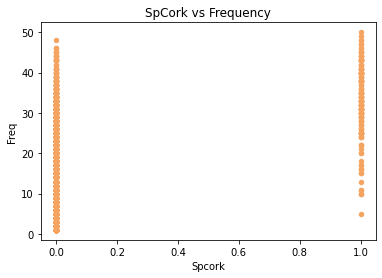

In [19]:
bets_df.plot.scatter(x = 'Spcork', y = 'Freq',
                  color = 'sandybrown', title = 'SpCork vs Frequency')